# CNN With Keras

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, ZeroPadding2D, Conv2D, BatchNormalization,
                                     MaxPooling2D, Dense, Flatten, Activation)
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [17]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

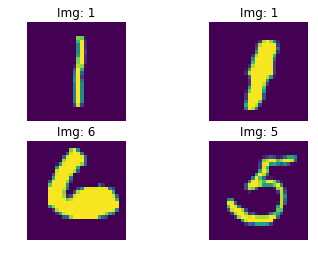

In [18]:
np.random.seed(31415)
fig = plt.figure()
samp_ixs = np.random.randint(0, X_train.shape[0], size=4)
for ix, img_ix in enumerate(samp_ixs):
    ax = fig.add_subplot(2, 2, ix + 1)
    ax.imshow(X_train[img_ix])
    ax.set_title(f"Img: {y_train[img_ix]}")
    ax.axis("off")

In [19]:
X_train, X_test = X_train.reshape(-1, 28, 28, 1) / 255.0, X_test.reshape(-1, 28, 28, 1) / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)
X_train, X_cv = X_train[:59000], X_train[59000:]
y_train, y_cv = y_train[:59000], y_train[59000:]

In [20]:
X_input = Input((28, 28, 1))
X = ZeroPadding2D((3, 3))(X_input)
X = Conv2D(32, (7, 7), name="conv0")(X)
X = BatchNormalization(axis=3, name="bn0")(X)
X = Activation("relu")(X)
X = MaxPooling2D(pool_size=(2, 2))(X)
X = Flatten()(X)
X = Dense(10, activation="softmax", name="output")(X)

model = Model(inputs=X_input, outputs=X)

In [24]:
%%time
model.compile("Adam", "categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, validation_data=(X_cv, y_cv), epochs=10);

Train on 59000 samples, validate on 1000 samples
Epoch 1/10
59000/59000 [==============================] - 62s 1ms/step - loss: 0.0589 - acc: 0.9818 - val_loss: 0.0718 - val_acc: 0.9870
Epoch 2/10
59000/59000 [==============================] - 61s 1ms/step - loss: 0.0410 - acc: 0.9867 - val_loss: 0.0630 - val_acc: 0.9870
Epoch 3/10
59000/59000 [==============================] - 61s 1ms/step - loss: 0.0305 - acc: 0.9902 - val_loss: 0.0535 - val_acc: 0.9910
Epoch 4/10
59000/59000 [==============================] - 61s 1ms/step - loss: 0.0246 - acc: 0.9923 - val_loss: 0.0615 - val_acc: 0.9860
Epoch 5/10
59000/59000 [==============================] - 61s 1ms/step - loss: 0.0201 - acc: 0.9936 - val_loss: 0.0702 - val_acc: 0.9900
Epoch 6/10
59000/59000 [==============================] - 61s 1ms/step - loss: 0.0175 - acc: 0.9942 - val_loss: 0.0627 - val_acc: 0.9910
Epoch 7/10
59000/59000 [==============================] - 61s 1ms/step - loss: 0.0141 - acc: 0.9953 - val_loss: 0.0669 - val_acc:

In [25]:
y_pred_cv = model.predict(X_cv).argmax(axis=1)
y_cv = y_cv.argmax(axis=1)

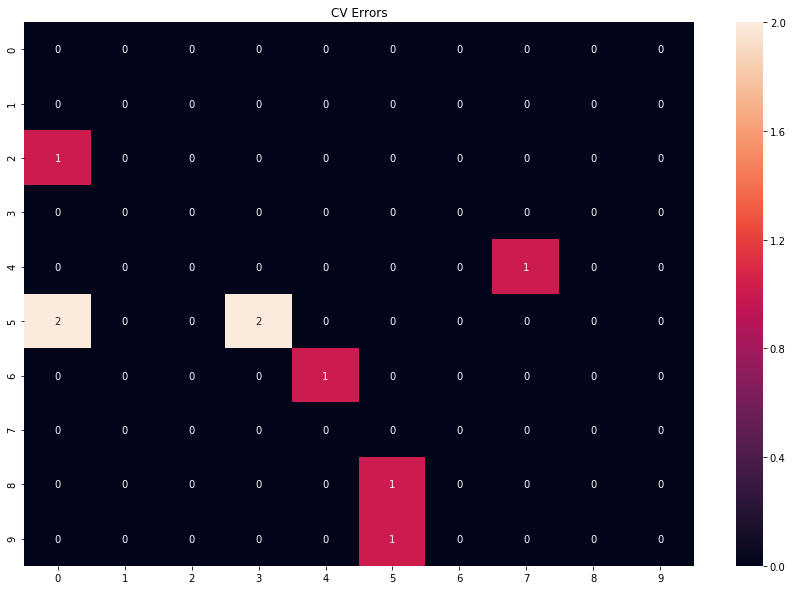

In [26]:
cm = confusion_matrix(y_cv, y_pred_cv)
cm = cm * (1 - np.identity(len(cm)))
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True)
plt.title("CV Errors");

In [27]:
where_errs = y_pred_cv != y_cv
X_errs = X_cv[where_errs]
y_true_errs = y_cv[where_errs]
y_pred_errs = y_pred_cv[where_errs]

In [28]:
y_true_errs

array([6, 5, 8, 9, 2, 5, 5, 5, 4])

In [29]:
y_pred_errs

array([4, 0, 5, 5, 0, 3, 3, 0, 7])

In [30]:
import pandas as pd
pd.DataFrame(np.c_[y_true_errs, y_pred_errs], columns=["True", "Pred"])

,True,Pred
0,6,4
1,5,0
2,8,5
3,9,5
4,2,0
5,5,3
6,5,3
7,5,0
8,4,7


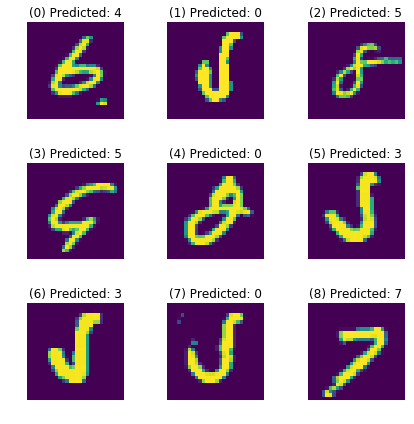

In [37]:
fig = plt.figure(figsize=(6,6))
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1)
    ax.set_title(f"({i}) Predicted: {y_pred_errs[i]}")
    ax.imshow(X_errs[i].reshape(28,28))
    ax.axis("off")
    
plt.tight_layout()